<a href="https://colab.research.google.com/github/pragnakulkarni/Netflix-Movies-and-TV-Shows/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/pragnakulkarni/Netflix-Movies-and-TV-Shows/main/netflix_titles.csv

--2024-07-30 09:13:51--  https://raw.githubusercontent.com/pragnakulkarni/Netflix-Movies-and-TV-Shows/main/netflix_titles.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix_titles.csv’

netflix_titles.csv  100%[===================>]   3.24M  --.-KB/s    in 0.08s   

2024-07-30 09:13:52 (42.8 MB/s) - ‘netflix_titles.csv’ saved [3399671/3399671]



Let's import the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Let's create a Pandas DataFrame for the dataset

In [3]:
netflix_df = pd.read_csv("/content/netflix_titles.csv")
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Datatypes of the dataframe and the individual column

In [4]:
netflix_df.dtypes
netflix_df['date_added'].dtype

dtype('O')

Let's see the number of rows and columns using the shape() function

In [5]:
netflix_df.shape

(8807, 12)

**8807** rows and **12** columns

Let's see for any null values present in the dataframe

In [6]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Dealing with null values in the "director" column

In [7]:
# Let's see how much percentage of director column has null values
missing_proportion = netflix_df['director'].isna().mean() * 100
'''missing_proportion = 29.908027705234474
# since the missing proportion is approximately 30% of the column,
#  so we are not going to drop those null values and are replacing them with the "Unknown" value'''
netflix_df['director'].fillna("Unknown", inplace = True)

Dealing with null values in the cast column

In [8]:
# Let's see how much percentage of cast column has null values
cast_missing = netflix_df['cast'].isnull().mean() * 100
# cast_missing = 9.367548540933349
''' since the missing proportion is approximately 10% of the column,
we are not going to drop those null values and are replacing them with the "Unknown" value'''
netflix_df['cast'].replace(np.NaN,'Unknown', inplace = True)

Dealing with null values in the country column

In [9]:
country_missing = netflix_df['country'].isnull().mean() * 100
# country_missing = 9.435676166685592
'''since the missing portion is approximately 10% of the column,
it is not good idea to drop these null values and we are dealing those null values based on the release year
and mode of the country of that release year'''
# max(netflix_df['release_year'].value_counts())
country_modes = netflix_df.groupby('release_year')['country'].agg(pd.Series.mode)
country_mode_map = country_modes.to_dict()
netflix_df['country'] = netflix_df.apply(lambda row: country_mode_map.get(row['release_year'], row['country'])
                                       if pd.isnull(row['country']) else row['country'], axis=1)

changing the date added format

In [10]:
''' now let's change the format of the column to the datetime format 'yyyy/mm/dd'
so that it will be easy to get information based on the date_added'''
netflix_df['date_added'] = netflix_df['date_added'].astype(str)
netflix_df['date_added'] = netflix_df['date_added'].str.strip()
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='%B %d, %Y', errors='coerce')

Dealing with the null values in 'date_added' column

In [11]:
netflix_df['date_added'].isnull().sum()
missing_dates = netflix_df['date_added'].isnull().mean() * 100
# missing_dates = 0.11354604292040424
'''since the missing dates percentage is 0.1% which is very low and negligible
 so we can delete those null rows'''
netflix_df.dropna(subset = ['date_added'], inplace = True)

Dealing with null values in the rating column

In [12]:
missing_rating = netflix_df['rating'].isnull().mean() * 100
# missing_rating = 0.04547004660679777
'''since the missing rating values percentage is very less we are going to delete the null rows'''
netflix_df.dropna(subset = ['rating'],inplace = True)

Dealing with null values in duration column

In [13]:
misssing_duration = netflix_df['duration'].isnull().mean() * 100
# misssing_duration = 0.0341180484476288
'''since the missing duration values percentage is very less we are going to delete the null rows'''
netflix_df.dropna(subset = ['duration'],inplace = True)

In [14]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now we have cleaned the dataset and is ready for the analysis

Analyse the content distribution of netflix (Movies or TV shows)

In [15]:
content_type = pd.DataFrame(netflix_df['type'].value_counts()).reset_index()
print(content_type)

      type  count
0    Movie   6126
1  TV Show   2664


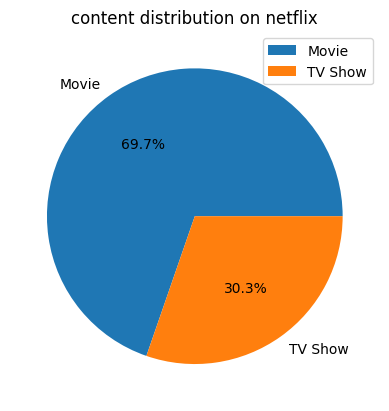

In [16]:
plt.pie(content_type['count'], labels = content_type['type'], autopct='%1.1f%%')
plt.title('content distribution on netflix')
plt.legend(content_type['type'], loc = 'best')

Netflix has more movies than TV shows

**Analysing the Directors**

In [17]:
all_directors = netflix_df['director'].str.split(',', expand = True).stack()
all_directors = all_directors.to_frame()
all_directors.columns = ['director']
all_directors['director'] = all_directors['director'].str.strip()
all_directors = all_directors.groupby('director').size().reset_index(name = 'total_count')
all_directors

,director,total_count
0,A. L. Vijay,2
1,A. Raajdheep,1
2,A. Salaam,1
3,A.R. Murugadoss,2
4,Aadish Keluskar,1
...,...,...
4987,Éric Warin,1
4988,Ísold Uggadóttir,1
4989,Óskar Thór Axelsson,1
4990,Ömer Faruk Sorak,3


In [18]:
known_directors = all_directors.loc[all_directors['director'] != 'Unknown']
known_directors

,director,total_count
0,A. L. Vijay,2
1,A. Raajdheep,1
2,A. Salaam,1
3,A.R. Murugadoss,2
4,Aadish Keluskar,1
...,...,...
4987,Éric Warin,1
4988,Ísold Uggadóttir,1
4989,Óskar Thór Axelsson,1
4990,Ömer Faruk Sorak,3


In [19]:
#sorting the known directors based on the total_count
known_directors = known_directors.sort_values(by = 'total_count', ascending = False)
known_directors

,director,total_count
3747,Rajiv Chilaka,22
1905,Jan Suter,21
3798,Raúl Campos,19
2864,Marcus Raboy,16
4455,Suhas Kadav,16
...,...,...
2292,Jovanka Vuckovic,1
634,Brandon Camp,1
2294,Juan Antin,1
2295,Juan Antonio de la Riva,1


**Top 10 Directors of the Netflix**

In [20]:
top10Directors = known_directors.head(10)
top10Directors

,director,total_count
3747,Rajiv Chilaka,22
1905,Jan Suter,21
3798,Raúl Campos,19
2864,Marcus Raboy,16
4455,Suhas Kadav,16
1953,Jay Karas,15
754,Cathy Garcia-Molina,13
2943,Martin Scorsese,12
1950,Jay Chapman,12
4940,Youssef Chahine,12


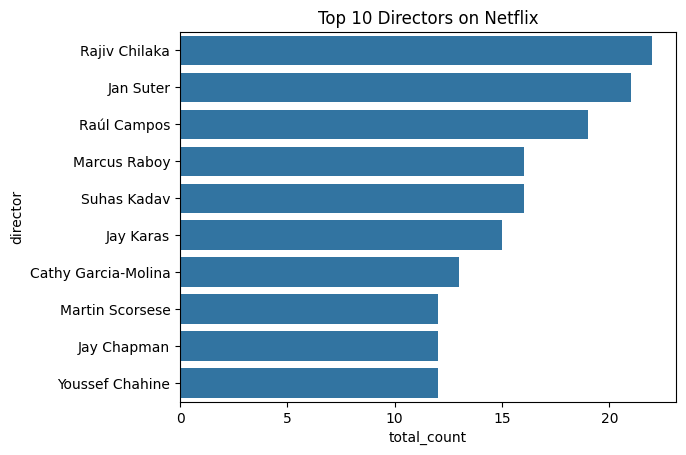

In [81]:
sns.barplot(data = top10Directors, x = top10Directors['total_count'], y = top10Directors['director'], orient = 'h')
plt.title('Top 10 Directors on Netflix', loc = 'center', pad = 6.0)
plt.show()


**Analysing the cast**

In [64]:
all_actors = netflix_df['cast'].str.split(',',expand = True).stack()
all_actors = all_actors.to_frame()
all_actors.columns = ['actor']
all_actors['actor'] = all_actors['actor'].str.strip()
all_actors = all_actors.groupby(['actor']).size().reset_index(name = 'film_count')
all_actors

,actor,film_count
0,"""Riley"" Lakdhar Dridi",1
1,'Najite Dede,2
2,2 Chainz,1
3,2Mex,1
4,4Minute,1
...,...,...
36388,Şevket Çoruh,1
36389,Şinasi Yurtsever,3
36390,Şükran Ovalı,1
36391,Şükrü Özyıldız,2


In the above block of code we have retrieved the film count(movie or TV show) of an each actor on the netflix. Now let us sort them in the descending order of their film count to take the top 10 actors of netflix

In [71]:
#Lets exclude the unknown cast category from the column
known_actors = all_actors.loc[all_actors['actor'] != 'Unknown']
known_actors

,actor,film_count
2825,Anupam Kher,43
30448,Shah Rukh Khan,35
16672,Julie Tejwani,33
24182,Naseeruddin Shah,32
32548,Takahiro Sakurai,32
...,...,...
25697,Pancho Demmings,1
25656,Pali Sidhu,1
25698,Pancho Garcia Aguirre,1
33464,Toke Makinwa,1


In [72]:
known_actors = known_actors.sort_values(by = 'film_count', ascending = False)
known_actors

,actor,film_count
2825,Anupam Kher,43
30448,Shah Rukh Khan,35
16672,Julie Tejwani,33
24182,Naseeruddin Shah,32
32548,Takahiro Sakurai,32
...,...,...
14203,Jamie Lissow,1
14202,Jamie Lever,1
14200,Jamie Lee,1
14227,Jamila Ibrahim,1


**Top 10 actors of Netflix**

In [74]:
top_10_actors = known_actors.head(10)
top_10_actors

,actor,film_count
2825,Anupam Kher,43
30448,Shah Rukh Khan,35
16672,Julie Tejwani,33
24182,Naseeruddin Shah,32
32548,Takahiro Sakurai,32
28933,Rupa Bhimani,31
845,Akshay Kumar,30
25388,Om Puri,30
35835,Yuki Kaji,29
1768,Amitabh Bachchan,28


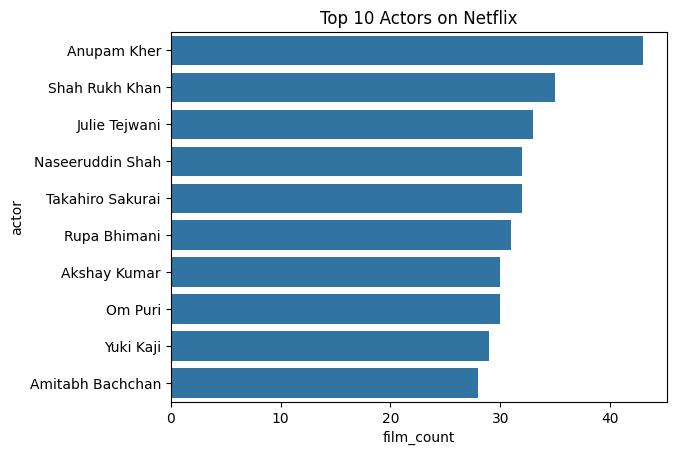

In [83]:
sns.barplot(data = top_10_actors, x = 'film_count', y = 'actor', orient = 'h')
plt.title('Top 10 Actors on Netflix')
plt.show()

**Analysing the country column**

In [110]:
all_countries = netflix_df['country'].str.split(',',expand = True).stack()
all_countries =all_countries.to_frame()
all_countries.columns = ['country']
all_countries['country'] = all_countries['country'].str.strip()
all_countries = all_countries.groupby('country').size().reset_index(name = 'country_count')
all_countries

,country,country_count
0,,7
1,Afghanistan,1
2,Albania,1
3,Algeria,3
4,Angola,1
...,...,...
118,Vatican City,1
119,Venezuela,4
120,Vietnam,7
121,West Germany,5


In [113]:
all_countries = all_countries.sort_values(by = 'country_count', ascending = False)
all_countries

,country,country_count
116,United States,4505
46,India,1049
115,United Kingdom,805
21,Canada,445
37,France,393
...,...,...
53,Jamaica,1
97,Slovakia,1
77,Nicaragua,1
35,Ethiopia,1


Top 10 countries that publieshed more on Netflix

In [114]:
top_10_countries = all_countries.head(10)
top_10_countries

,country,country_count
116,United States,4505
46,India,1049
115,United Kingdom,805
21,Canada,445
37,France,393
54,Japan,316
103,Spain,232
101,South Korea,231
39,Germany,226
68,Mexico,169
